In [9]:
from yahoo_finance import Share
import pandas as pd
%matplotlib inline  
import matplotlib.pyplot as plt
yahoo = Share('YHOO')
google = Share('GOOG')

In [10]:
# These are the "Tableau 20" colors as RGB.
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [11]:
yahoo_historical_data = pd.DataFrame(yahoo.get_historical('2004-02-01','2017-02-01'))
google_historical_data = pd.DataFrame(google.get_historical('2004-02-01','2017-02-01'))
yahoo_historical_data = yahoo_historical_data.sort_index(ascending=False)
google_historical_data = google_historical_data.sort_index(ascending=False)

yahoo_historical_data = yahoo_historical_data.set_index('Date')
google_historical_data = google_historical_data.set_index('Date')

In [12]:
for i in list(yahoo_historical_data):
    if i != 'Symbol':
        yahoo_historical_data[i] = pd.to_numeric(yahoo_historical_data[i])
        google_historical_data[i] = pd.to_numeric(google_historical_data[i])


In [13]:
yahoo_historical_data['Trading_Volume'] = yahoo_historical_data['Close'] * yahoo_historical_data['Volume']
google_historical_data['Trading_Volume'] = google_historical_data['Close'] * google_historical_data['Volume']

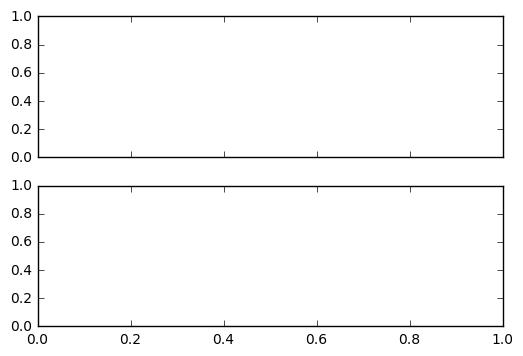

In [14]:
fig,[axe1,axe2] = plt.subplots(nrows=2, ncols=1,sharex='all')

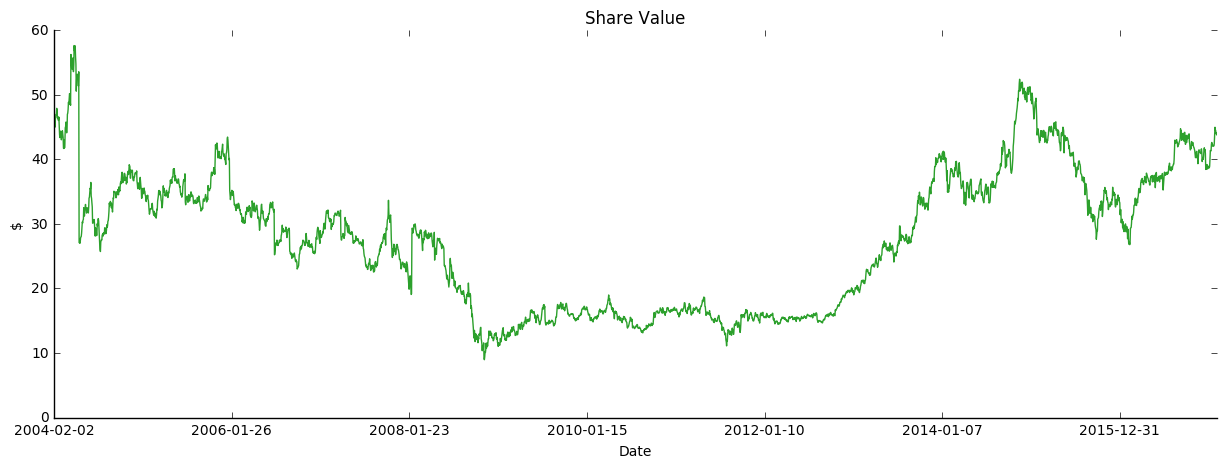

In [28]:
fig,axe1 = plt.subplots(nrows=1, ncols=1,sharex='all', figsize = (15,5))
#plt.figure(figsize=(25,25))


axe1.spines["top"].set_visible(False)
#axe1.spines["bottom"].set_visible(False)
axe1.spines["right"].set_visible(False)
#axe1.spines["left"].set_visible(False)
#axe1.get_xaxis().tick_bottom()
#axe1.get_yaxis().tick_left()

#axe2.spines["top"].set_visible(False)
#axe2.spines["bottom"].set_visible(False)
#axe2.spines["right"].set_visible(False)
#axe2.spines["left"].set_visible(False)
#axe2.get_xaxis().tick_bottom()
#axe2.get_yaxis().tick_left()

axe1.set_ylabel('$')
#axe2.set_ylabel('$ Billion')

yahoo_historical_data['Close'].plot(ax=axe1, kind='line',lw= 1, color=tableau20[4], title='Share Value')
#google_historical_data['Close'].plot(ax=axe1, kind='line',lw= 1, color=tableau20[2])

yahoo_historical_data['Volume'].plot(ax=axe2, kind='line',lw= 1, color=tableau20[4], title='Trading Volume')
#google_historical_data['Volume'].plot(ax=axe2, kind='line',lw= 1 , color=tableau20[2])

In [38]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.0.7


In [40]:
init_notebook_mode(connected=True)

In [83]:
yahoo_historical_data.index

List = ['2017-01-30', '2017-01-31', '2017-02-01']
yahoo_historical_data['Close'].ix[List].tolist()

[43.93, 44.07, 43.779999]

In [58]:

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

In [89]:
yahoo_historical_data['Close'].ix['2017-01-30']

43.93

In [95]:


layout = go.Layout(
    showlegend=False,
    annotations=[
        dict(
            x='2008-05-29',
            y=yahoo_historical_data['Close'].ix['2008-05-29'].tolist(),
            xref='x',
            yref='y',
            text='Financial Crisis',
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        ),
        dict(
            x='2011-08-01',
            y=yahoo_historical_data['Close'].ix['2011-08-01'].tolist(),
            xref='x',
            yref='y',
            text='Low closing',
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        )
    ]
)

In [94]:
trace1 = Scatter(x=yahoo_historical_data.index, y=yahoo_historical_data.Close)

#trace2 = Scatter(x=list, y=yahoo_historical_data['Close'].ix[List].tolist())

data = [trace1]

fig = go.Figure(data=data, layout=layout)
iplot(fig)

#iplot(data)

In [97]:
trace1 = Scatter(x=yahoo_historical_data.index, y=yahoo_historical_data.Close)

trace2 = Scatter(x=google_historical_data.index, y=google_historical_data.Close)

data = [trace1,trace2]

fig = go.Figure(data=data)
iplot(fig)

#iplot(data)

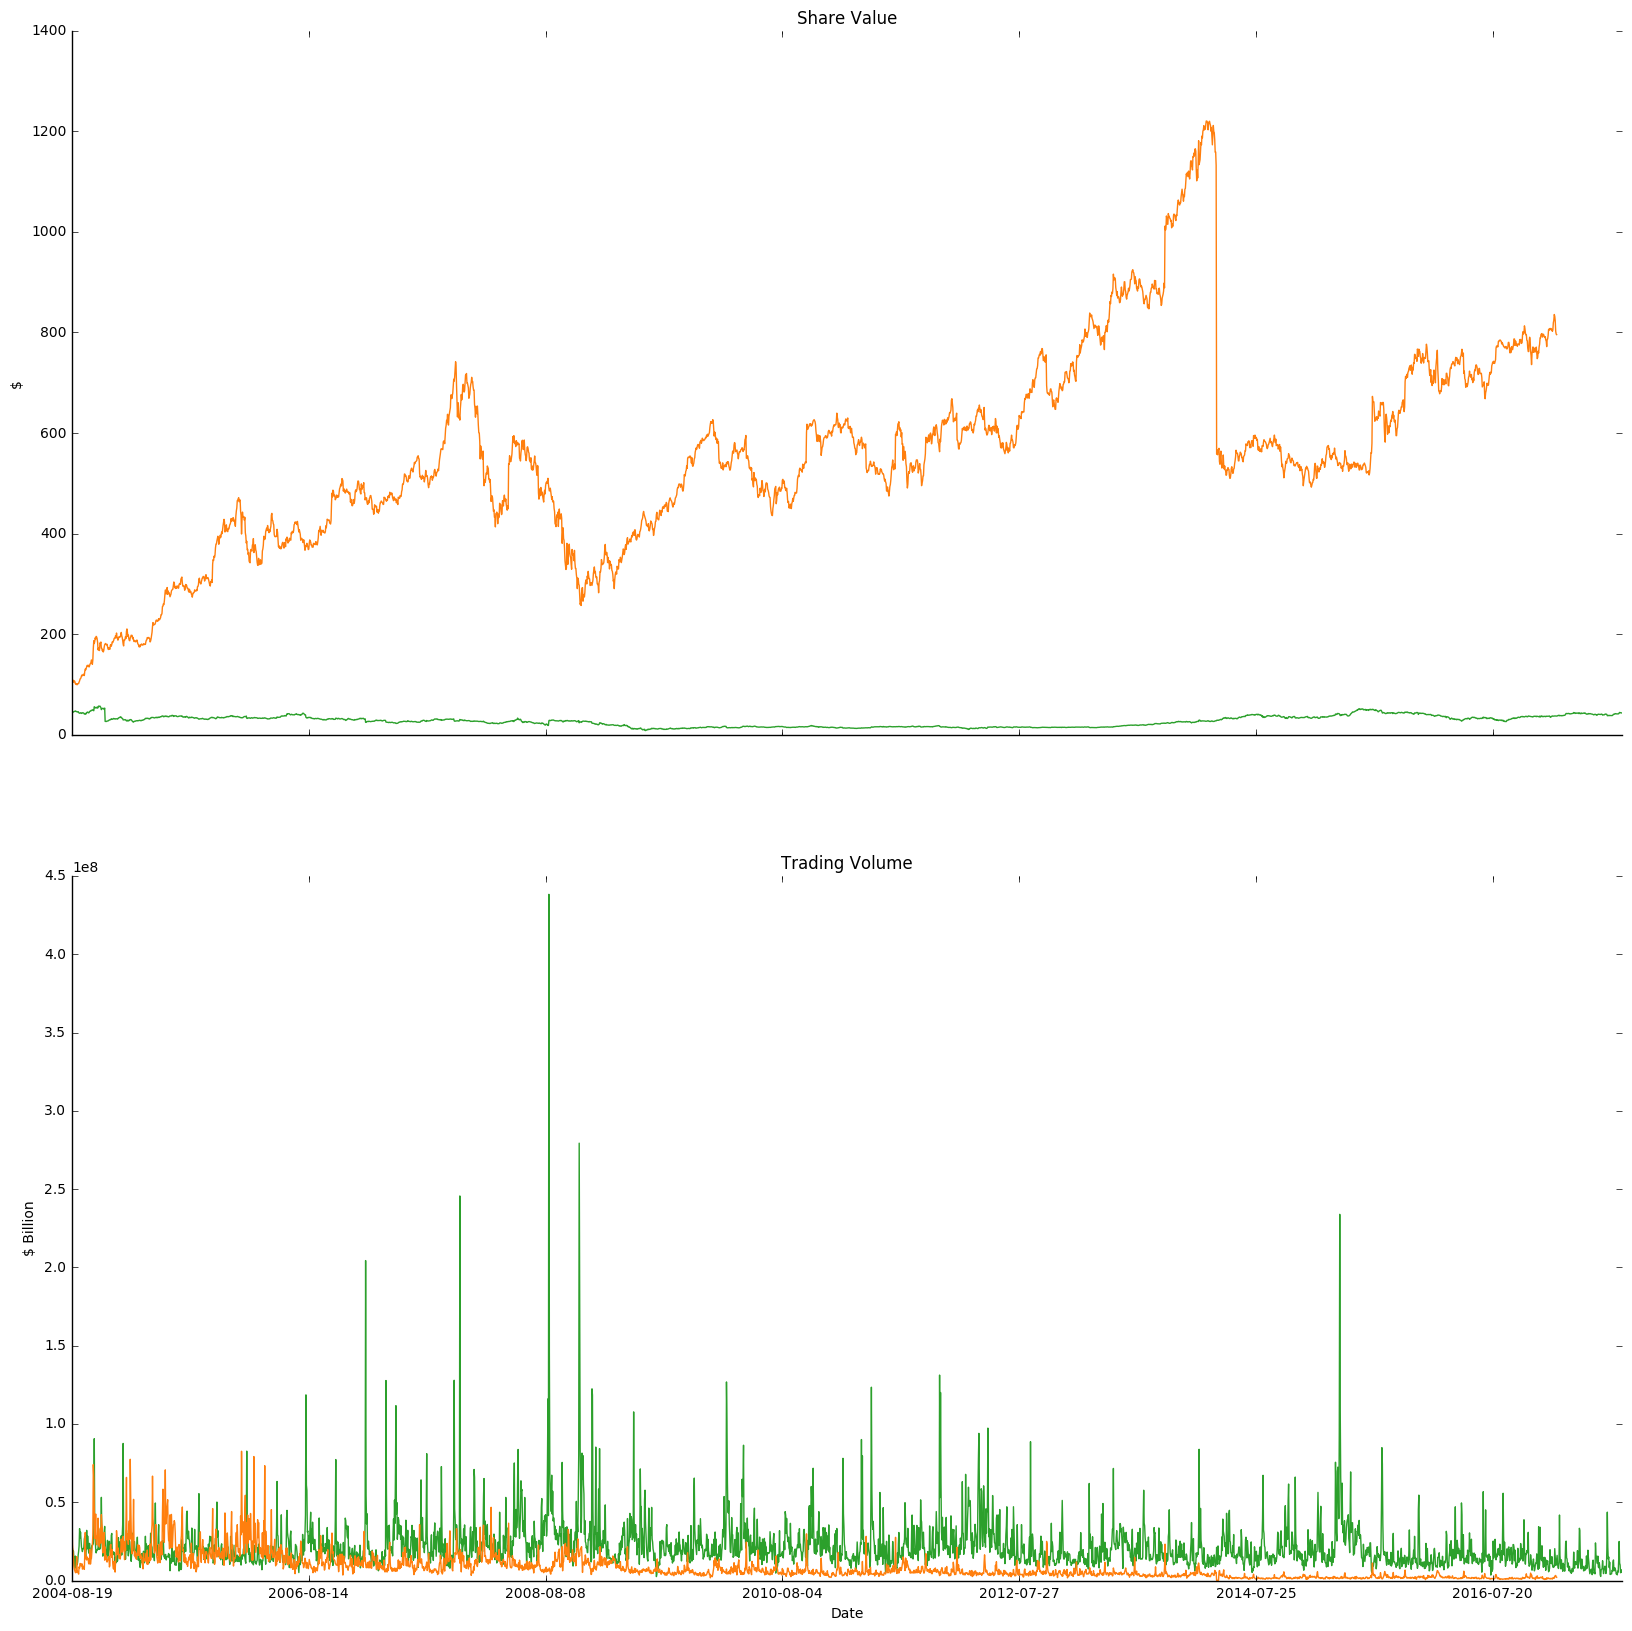

In [19]:
fig,[axe1,axe2] = plt.subplots(nrows=2, ncols=1,sharex='all', figsize = (20,20))
#plt.figure(figsize=(25,25))


axe1.spines["top"].set_visible(False)
#axe1.spines["bottom"].set_visible(False)
axe1.spines["right"].set_visible(False)
#axe1.spines["left"].set_visible(False)
#axe1.get_xaxis().tick_bottom()
#axe1.get_yaxis().tick_left()

axe2.spines["top"].set_visible(False)
#axe2.spines["bottom"].set_visible(False)
axe2.spines["right"].set_visible(False)
#axe2.spines["left"].set_visible(False)
#axe2.get_xaxis().tick_bottom()
#axe2.get_yaxis().tick_left()

axe1.set_ylabel('$')
axe2.set_ylabel('$ Billion')

yahoo_historical_data['Close'].plot(ax=axe1, kind='line',lw= 1, color=tableau20[4], title='Share Value')
google_historical_data['Close'].plot(ax=axe1, kind='line',lw= 1, color=tableau20[2])

yahoo_historical_data['Volume'].plot(ax=axe2, kind='line',lw= 1, color=tableau20[4], title='Trading Volume')
google_historical_data['Volume'].plot(ax=axe2, kind='line',lw= 1 , color=tableau20[2])
